In [4]:
!pip install tqdm

In [3]:
!pip install tensorflow

In [2]:
!pip install opencv-python

In [5]:
!pip install seaborn

In [6]:
!pip install sklearn

In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
# from keras.optimizers import  Adam

In [3]:
#%%'定義子資料夾名稱&對應的數字，檔名不能有中文'
class_names = ['AmericanFood','AsianFood','Bar','BBQ',\
              'Cefa','ChineseFood','EuropeanFood','FrenchFood',\
              'Gnill','JapaneseFood','KoreanFood','ltialianFood',\
              'MultiCultural','Seafood','Sushi',\
              'TaiwaneseFood','ThaiFood','Vegan','Vegetrian'] 
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64) #定義圖片大小

In [4]:
def load_data(): 
    datasets = ['seg_train', 'seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
              
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output



In [6]:
(train_images, train_labels), (test_images, test_labels) = load_data()
#'隨機性' 打散資料
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
#'標準化' 隊訓練資料跟測試資料做標準化
train_images = train_images / 255.0 
test_images = test_images / 255.0



Loading seg_train


100%|██████████| 100/100 [00:00<00:00, 191.15it/s]


Loading seg_test


100%|██████████| 31/31 [00:00<00:00, 1412.85it/s]


In [9]:
#'建模'
(train_images, train_labels), (test_images, test_labels) = load_data()
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
train_images = train_images / 255.0 
test_images = test_images / 255.0
input_shape = (64,64,3) #圖片格式

model = Sequential([
          
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
                              # strides,每隔幾步做掃描
    MaxPooling2D(pool_size=(2, 2), strides=2),#池化層，壓縮特稱出來的圖，(2,2)這個大小
    Dropout(0.2),#怕過度配適，會隨機丟掉一些資料
    
    #以下為第二層
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    
    
    Flatten(), #把圖片攤平的動作
    Dropout(0.5),
    
    Dense(19,activation='softmax') 
]) 

model.compile(optimizer = 'adam', #SGD(lr=0.1)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
                    batch_size=128, epochs=20)
            
    

Loading seg_train


100%|██████████| 100/100 [00:00<00:00, 188.54it/s]


Loading seg_test


100%|██████████| 31/31 [00:00<00:00, 1351.44it/s]


## 訓練模型

In [10]:
#訓練模型
history = model.fit(train_images, train_labels, 
                    batch_size=128, epochs=20)
                                    #跑10遍

Epoch 1/20
16/16 [==============================] - 13s 89ms/step - loss: 2.9421 - accuracy: 0.0841
Epoch 2/20
16/16 [==============================] - 1s 92ms/step - loss: 2.8654 - accuracy: 0.1319
Epoch 3/20
16/16 [==============================] - 1s 91ms/step - loss: 2.7310 - accuracy: 0.1670
Epoch 4/20
16/16 [==============================] - 1s 89ms/step - loss: 2.5280 - accuracy: 0.2263
Epoch 5/20
16/16 [==============================] - 2s 96ms/step - loss: 2.2993 - accuracy: 0.2723
Epoch 6/20
16/16 [==============================] - 2s 107ms/step - loss: 2.0799 - accuracy: 0.3296
Epoch 7/20
16/16 [==============================] - 2s 118ms/step - loss: 1.9753 - accuracy: 0.3502
Epoch 8/20
16/16 [==============================] - 2s 113ms/step - loss: 1.8822 - accuracy: 0.3931
Epoch 9/20
16/16 [==============================] - 2s 113ms/step - loss: 1.7720 - accuracy: 0.4479
Epoch 10/20
16/16 [==============================] - 2s 119ms/step - loss: 1.7086 - accuracy: 0.4296
Epo

## 跑測試集

In [11]:
#'預測'測試資料
predictions = model.predict(test_images)     
pred_labels = np.argmax(predictions, axis = 1)
# print(pred_labels)

## 驗證

0.5406698564593302


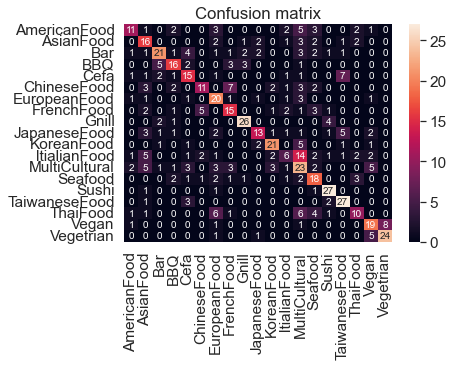

In [12]:


CM = confusion_matrix(test_labels, pred_labels)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print(accuracy(CM))

ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

## 存模型

In [13]:
#'存模型'
from keras.models import load_model
model.save("food_model")

INFO:tensorflow:Assets written to: food_model\assets


## 讀模型

In [14]:
#讀模型
from keras.models import load_model
model = load_model('food_model')

## 放入訓練集以外圖片

台灣小吃


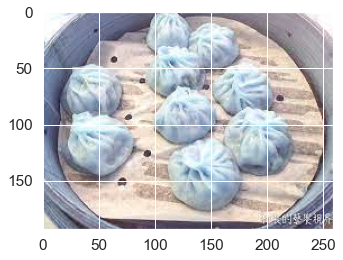

In [38]:
#放入訓練集以外圖片
import matplotlib.pyplot as plt

img = cv2.imread('./Xiao Long Bao.jpg',1)
img = cv2.cvtColor(img,1)
plt.imshow(cv2.cvtColor(img,1))
img = cv2.resize(img, (64, 64))
img = img/255.0
img = np.asarray(img).reshape(-1,64, 64,3)

#丟入模型
result = np.argmax(model.predict(img))
# print(model.predict(img))
# print(result)
type_ = {'0': '美式料理', '1': '亞洲料理', '2': '酒吧',\
         '3':'烤肉','4':'咖啡廳','5':'中式料理',\
         '6':'歐式料理','7':'法式料理','8':'Gnill',\
         '9':'日式料理','10':'韓式料理','11':'義式料理',\
         '12':'多國料理','13':'海鮮','14':'壽司',\
         '15':'台灣小吃','16':'泰式料理','17':'青菜',\
         '18':'提供素食料理'}
    
type_name = type_[str(result)]    
print(type_name)
